## ANKIT GOND
## 1806016

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('heart_diagnosis.csv', sep= ',')
data.head()

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,severity
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
data.describe()

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,severity
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
# lets catergories the age into 
# 1: young age (29-40) , 
# 2: middle age (40-55) , and 
# 3: oldage(<50)
data.loc[(data.age >= 29) & (data.age < 40), 'age'] = 1
data.loc[(data.age >= 40) & (data.age < 55) , 'age'] = 2
data.loc[(data.age >= 55) , 'age'] = 3

# convert to number
data.ca = pd.to_numeric(data.ca,errors='coerce').fillna(0)
data.thal = pd.to_numeric(data.thal,errors='coerce').fillna(0)

In [ ]:
data.head()

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,severity
0,3,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,3,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,3,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,1,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,2,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


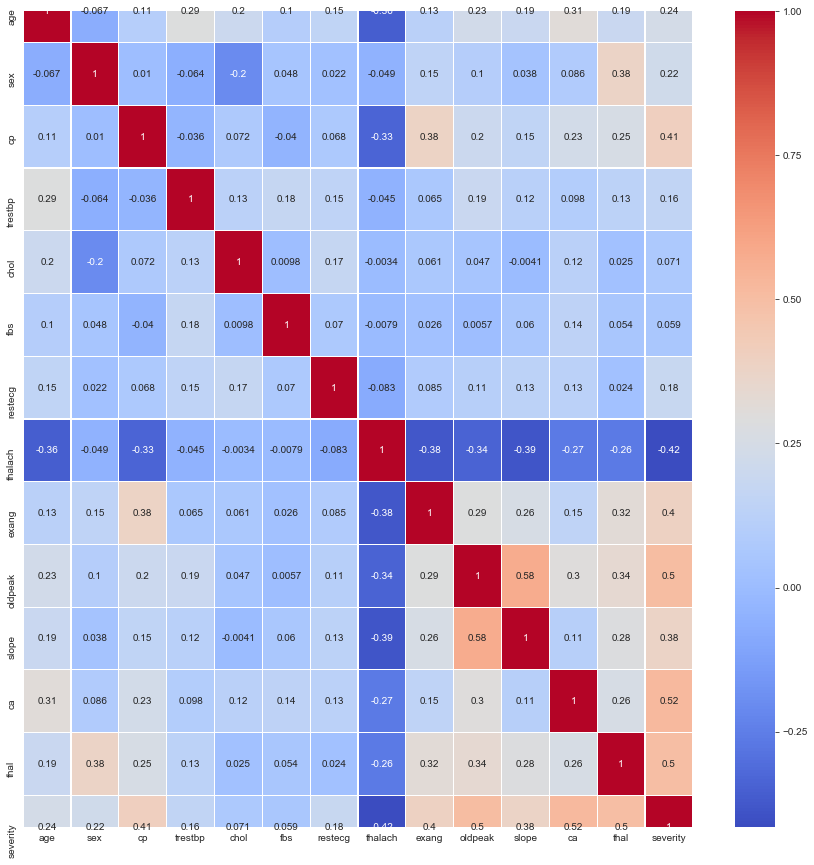

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap='coolwarm', annot = True, linewidths=.2)
plt.show()

In [ ]:
data1 = data.drop(data.columns[[3,4,5,6,7]],axis=1)
data_X = data1.drop('severity',axis=1)
data_Y = data1['severity']

In [ ]:
#Normalize the data
normal_data_X = (data_X - np.min(data_X)) / (np.max(data_X) - np.min(data_X))
train_X,test_X,train_y,test_y =train_test_split(normal_data_X,data_Y,random_state=0,test_size=0.2)
print('test_X',test_X.shape)
print('test_Y',test_y.shape)
print('train_X',train_X.shape)
print('train_Y',train_y.shape)

test_X (61, 8)
test_Y (61,)
train_X (242, 8)
train_Y (242,)


In [ ]:
rf=RandomForestClassifier(n_estimators=1,random_state=1003)
rf.fit(train_X,train_y)
rfpr=rf.predict(test_X)
rfac=rf.score(test_X,test_y)
print(" Accuracy of RandomForest Model : ",rfac*100)

 Accuracy of RandomForest Model :  60.65573770491803
